In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
import numpy as np
from sklearn.base import clone
import importlib
import utils
importlib.reload(utils)
from utils import plot_y_yhat,clean_train_data,error_metric

In [209]:
train=pd.read_csv('../data/train_data.csv')
test=pd.read_csv('../data/test_data.csv')
sample_submission=pd.read_csv('../data/sample_submission.csv')

In [210]:
print(train.shape)
train.head(10)

(400, 10)


,id,Age,Gender,Stage,GeneticRisk,TreatmentType,ComorbidityIndex,TreatmentResponse,SurvivalTime,Censored
0,0,65.0,0,2,1.0,0,0.0,0.0,4.2,0
1,1,68.0,1,2,0.0,1,1.0,1.0,4.7,1
2,2,68.0,1,3,1.0,1,0.0,1.0,3.5,1
3,3,81.0,1,4,1.0,1,3.0,0.0,2.3,0
4,4,59.0,1,2,1.0,0,NaN,0.0,NaN,0
5,5,47.0,1,4,1.0,1,NaN,0.0,2.6,0
6,6,59.0,1,2,0.0,0,0.0,0.0,NaN,0
7,7,50.0,1,4,0.0,1,1.0,1.0,NaN,0
8,8,67.0,0,4,0.0,0,2.0,0.0,NaN,0
9,9,68.0,1,1,0.0,0,1.0,1.0,6.4,0


In [211]:
print(test.shape)
test.head(10)

(100, 8)


,id,Age,Gender,Stage,GeneticRisk,TreatmentType,ComorbidityIndex,TreatmentResponse
0,0,71.0,1,4,NaN,1,1.0,1.0
1,1,57.0,1,4,0.0,0,NaN,0.0
2,2,66.0,0,2,0.0,0,0.0,1.0
3,3,73.0,0,3,NaN,1,1.0,1.0
4,4,53.0,1,4,0.0,0,0.0,0.0
5,5,72.0,1,4,NaN,1,0.0,1.0
6,6,57.0,1,1,0.0,0,NaN,NaN
7,7,61.0,0,2,0.0,1,3.0,0.0
8,8,78.0,0,2,NaN,0,2.0,0.0
9,9,60.0,1,3,0.0,0,1.0,0.0


In [212]:
sample_submission.head(10)

,id,0
0,0,0.110308
1,1,-1.156013
2,2,-0.029864
3,3,0.801954
4,4,-0.224954
5,5,0.374992
6,6,1.819530
7,7,1.915022
8,8,-1.287941
9,9,0.567053


In [213]:
print(train.columns.tolist())
display(train.describe())

['id', 'Age', 'Gender', 'Stage', 'GeneticRisk', 'TreatmentType', 'ComorbidityIndex', 'TreatmentResponse', 'SurvivalTime', 'Censored']


,id,Age,Gender,Stage,GeneticRisk,TreatmentType,ComorbidityIndex,TreatmentResponse,SurvivalTime,Censored
count,400.000000,400.00000,400.000000,400.000000,315.000000,400.000000,355.000000,371.000000,240.000000,400.000000
mean,199.500000,65.14250,0.590000,2.565000,0.285714,0.412500,1.092958,0.514825,4.479583,0.197500
std,115.614301,9.55434,0.492449,1.081063,0.452473,0.492901,0.869983,0.500455,2.015370,0.398611
min,0.000000,40.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,99.750000,59.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,199.500000,65.00000,1.000000,2.500000,0.000000,0.000000,1.000000,1.000000,4.100000,0.000000
75%,299.250000,72.00000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,5.700000,0.000000
max,399.000000,90.00000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,12.100000,1.000000


In [214]:
print(test.columns.tolist())
print(sample_submission.columns.tolist())

['id', 'Age', 'Gender', 'Stage', 'GeneticRisk', 'TreatmentType', 'ComorbidityIndex', 'TreatmentResponse']
['id', '0']


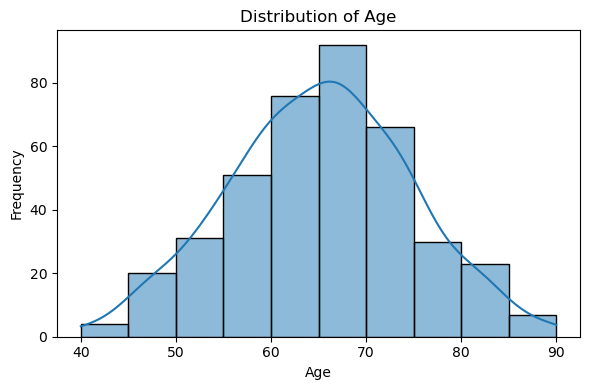

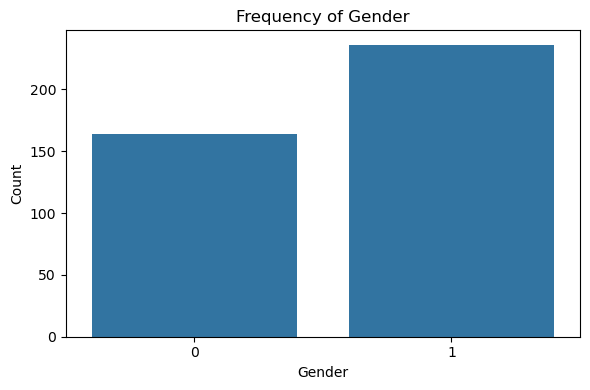

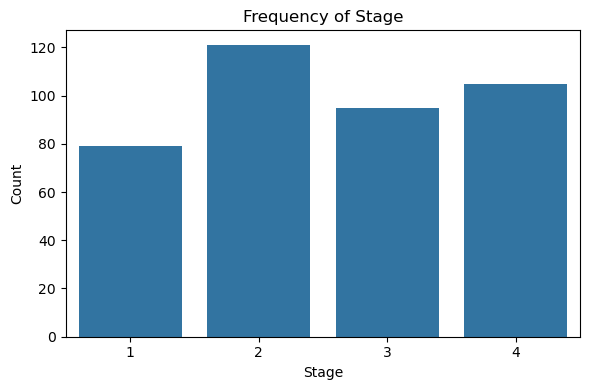

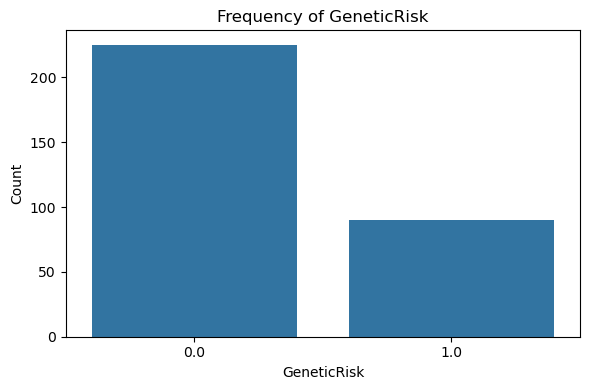

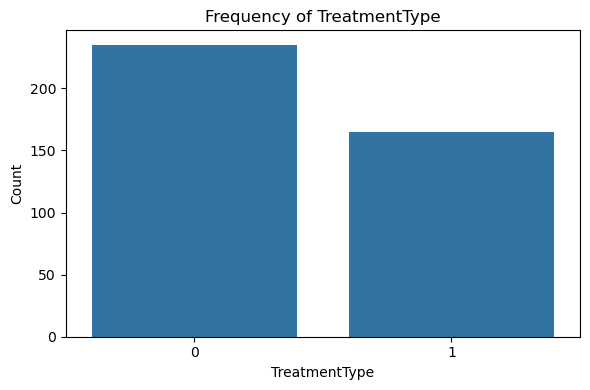

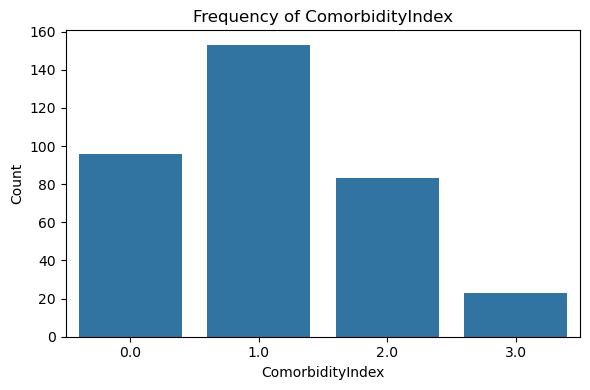

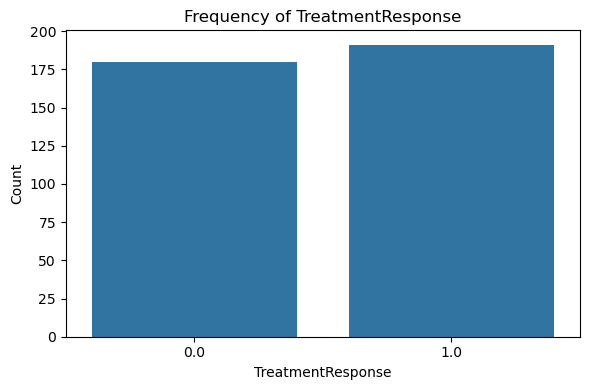

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques sauf "id"
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = [col for col in numeric_cols if col != "id"]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    data = train[col].dropna()
    unique_vals = data.unique()

    if len(unique_vals) <= 10:
        # Variables discrètes → barplot seaborn
        sns.countplot(x=col, data=train)
        plt.title(f"Frequency of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")

    else:
        # Variables continues → histplot seaborn (comme ton exemple)
        sns.histplot(data, kde=True, bins=10)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


In [ ]:
ax = msno.bar(train, color="lightgray")
columns = train.columns.tolist()
id_index = columns.index('id')
bars = ax.patches
bars[id_index].set_color('red')
plt.show()

In [ ]:
msno.heatmap(train), msno.matrix(train), msno.dendrogram(train)

In [ ]:
missing_per_row = train.isnull().sum(axis=1)
plt.figure(figsize=(8,5))
plt.hist(missing_per_row, bins=range(0, train.shape[1]+2), align='left', edgecolor='black')
plt.xlabel("Number of missing features")
plt.ylabel("Number of individuals")
plt.title("Histogram of missing values per individual")
plt.xticks(range(0, train.shape[1]+1))  # ensure each integer is a tick
plt.show()

In [ ]:
cols_with_missing = [col for col in train.columns if train[col].isna().sum() > 0 and col != "SurvivalTime"]
train_clean = train.drop(columns=cols_with_missing)
train_clean = train_clean.dropna(subset=["SurvivalTime"])
train_clean = train_clean[train_clean["Censored"] == 0]
train_clean.shape

In [ ]:
sns.pairplot(
    train_clean,
    y_vars=["SurvivalTime"],
    x_vars=[col for col in train_clean.columns if col not in ["id", "Censored", "SurvivalTime"]]
)
plt.suptitle("Pairplot between remaining features and Survival Time", y=1.02)
plt.show()

In [ ]:
categorical = ["Gender", "Stage", "TreatmentType"]

for cat in categorical:
    plt.figure(figsize=(5,3))
    sns.boxplot(
        x=cat,
        y="SurvivalTime",
        hue=cat,              # ← obligatoire pour palette
        data=train,
        palette="Set2",
        legend=False
    )
    plt.title(f"Survival Time distribution by {cat}")
    plt.xlabel(cat)
    plt.ylabel("Survival Time")
    plt.show()
    
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="SurvivalTime", data=train, alpha=0.6)
plt.title("Survival Time by Age")
plt.xlabel("Age")
plt.ylabel("Survival Time")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
corr_matrix = train_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables restantes")
plt.show()

In [ ]:
X = train_clean[['Age', 'Gender', 'Stage', 'TreatmentType', 'Censored']]
y = train_clean["SurvivalTime"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60/40
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20/20

print(f"  Train set: {len(X_train)} samples")
print(f"  Validation set: {len(X_val)} samples")
print(f"  Test set: {len(X_test)} samples\n")

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_sizes = []
val_sizes = []

for train_index, val_index in kf.split(X_train_cv):
    train_sizes.append(len(train_index))
    val_sizes.append(len(val_index))

print("Cross-validation (5-fold) sizes:")
print(f"  Train folds: {np.mean(train_sizes):.1f} ± {np.std(train_sizes):.1f} samples on average")
print(f"  Validation folds: {np.mean(val_sizes):.1f} ± {np.std(val_sizes):.1f} samples on average")
print(f"  Test set: {len(X_test_cv)} samples\n")

In [ ]:
X = train_clean[['Age', 'Gender', 'Stage', 'TreatmentType']] #censored constant -> useless
y = train_clean["SurvivalTime"]

In [ ]:
def error_metric(y, y_hat, c):
    import numpy as np
    err = y-y_hat
    err = (1-c)*err**2 + c*np.maximum(0,err)**2
    return np.sum(err)/err.shape[0]

In [ ]:
#task 1.2

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('regressor', LinearRegression())
])

In [ ]:
# Option 1 : train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
baseline_error = error_metric(y_test.values, y_hat, c=0)
print("Baseline error_metric (train/test split):", baseline_error)
plot_y_yhat(y_test, y_hat)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
cv_scores = []
models = []

for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    
    model = clone(pipeline)
    model.fit(X_tr, y_tr)
    
    y_hat = model.predict(X_te)
    score = error_metric(y_te.values, y_hat, c=0)
    cv_scores.append(score)
    
    plot_y_yhat(y_te, y_hat)
    
    models.append(model)

print(f"Baseline error_metric ({kf.n_splits}-fold CV):", np.mean(cv_scores))

In [ ]:
X_test = test[['Age', 'Gender', 'Stage', 'TreatmentType']]

y_test_pred = np.zeros(len(X_test))
for model in models:
    y_test_pred += model.predict(X_test)
y_test_pred /= len(models)  # moyenne

submission = pd.DataFrame({
    'id': test.index, 
    0: y_test_pred
})

submission.to_csv('baseline-submission.csv', index=False)
